# Boston House Price Dataset

In [46]:
# import python packages I will use
# for plotting
import matplotlib.pyplot as plt 
# for plotting
import seaborn as sns
# For neural networks.
import keras as kr
# For data frames.
import pandas as pd
# For numerical arrays.
import numpy as np
# For preprocessing data.
import sklearn.preprocessing as pre
# For splitting data sets.
import sklearn.model_selection as mod
# For whitening.
import sklearn.decomposition as dec
from sklearn import linear_model
# using scipy stats for the t test
import scipy.stats as ss


In [2]:
#This line makes sure that matplotlib prints the plots
%matplotlib inline
# This just sets the default plot size to be bigger.
plt.rcParams['figure.figsize'] = (12, 10)

## Purpose of Project

* **Describe**: Use descriptive statistics and plots to describe the Boston House Prices dataset
* **Infer**: use inferential statistics to analyse whether there is a significant difference in median house prices
between houses that are along the Charles river and those that aren’t. You should explain and discuss your findings.
* **Predict**:  use keras to create a neural network that can predict the median house price based on the other variables in the dataset.

## Getting to know the Dataset

I downloaded the dataset from the following website https://www.kaggle.com/altavish/boston-housing-dataset#HousingData.csv

In [3]:
# reading in the dataset from a csv file to jupyter
pd.read_csv("BostonHousingData.csv")

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,NaN,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,NaN,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [4]:
# reading in the file again this time as a dataframe, it wont print unless told to
df = pd.read_csv("BostonHousingData.csv")
# describing the dataset using descriptive statistics
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560262,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


After looking at the above numbers I noticed that there are missing values in the count.  After doing some research into the dataset I have decided to pull the dataset from sklearn.

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html

In [5]:
# getting the dataset from sklearn, it is a built in dataset
from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [6]:
print(boston_dataset.data.shape)

(506, 13)


In [7]:
# printing the data in raw form
boston_dataset

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

The above data is not very user friendly, certainly not as easy to read as it was in the dataframe, but again I have run into a problem with the dataset, I see that there are only 13 columns and printing it has not helped me see what is missing now.  

In [8]:
list(boston_dataset.keys())
#https://stackoverflow.com/questions/44655866/get-list-of-keys-in-xarray-dataset

['data', 'target', 'feature_names', 'DESCR', 'filename']

I think I need to look at these keys to see how to get that missing column.

In [9]:
boston_dataset.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [10]:
# printing out the target data, which is the prices column
boston_dataset.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [11]:
# This give a list of the attributes in the dataset
print(boston_dataset.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [12]:
# this gives us a description of the attributes of the dataset
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## The Dataset
The above cell is fascinating.  It describes the dataset and tells us that it is from 'Hedonic
prices and the demand for clean air'.  It tells us what each data column is.  There are 13 attributes with 506 datapoints for each. 

The dataset is small with only 506 value in 14 attributes.  It has attributes from suburbs in Boston to help predict prices.  There are Crime figures, Zoned land figures, Industrial value,  whether or not the suburb is tracking the Charles River or not, air quality values, average rooms per house, age of the house, distance from employment centres, accessable highways, property tax, pupil teacher ratio, racial breakdown, % of lower status population and the median values of homes.

As per the description the CRIM figures above are per town I am assuming that all figures are per town.

One figure that jumps out at me is the max figure for RM is 8.78, initially I thought that this had to be wrong as you can't have .78 rooms but after looking at the description it is the max of the average number of rooms per dwelling per town.

In [13]:
# 
print(boston_dataset.filename)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\data\boston_house_prices.csv


## Describe the Dataset

First I will read the data into a dataframe to make it readable.

In [14]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


The Medv column from above seems to be the missing one, it is target in the new dataset. I will add that column as Medv in to the dataset.

In [15]:
# adding the target column
boston['MEDV'] = boston_dataset.target
# As this value is in $000's
# boston['MEDV'] = boston['MEDV'] * 1000

In [16]:
# printing out the data to make sure all columns are there
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


As MEDV was a target in the dataset I think it is a good place to start for a plot and see what distribution it takes.

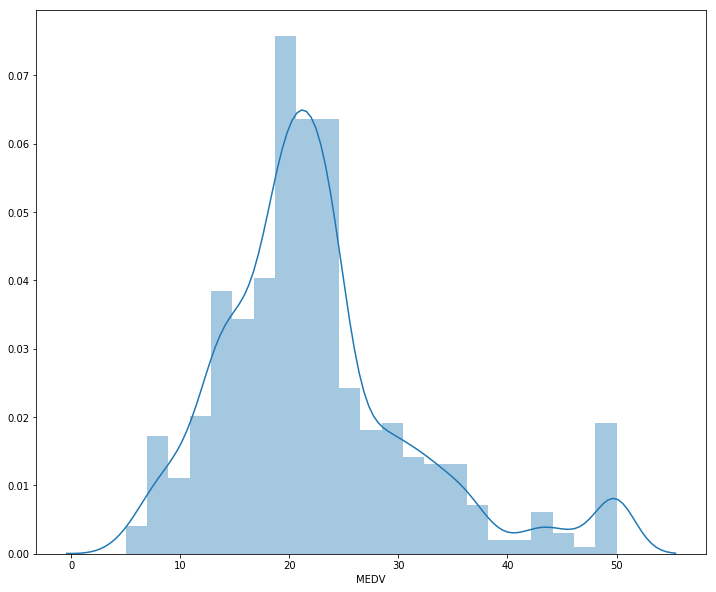

In [17]:
# plotting the distribution of values, MEDV variable of the dataset
sns.distplot(boston['MEDV'])
plt.show()

The Median price column looks for the most part to have a normal distribution.  There are a number of outliers at 50,000.  I am not sure if there is a flaw in the data or if this is correct.  

During my research I have found many pages analysing the dataset but none to look at the River Charles (CHAS) which is a main element of the inferential statistics part of my project.

Below we will use the describe function in Pandas it is very useful and gives mean, min, max and standard deviation from the mean while also giving quartile values too.


In [18]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


There is a large amount of data here and I am not sure what figures to plot against what.  In seaborn there is a correlational heatmap that will show what if any relation there is between figures.

https://seaborn.pydata.org/generated/seaborn.heatmap.html



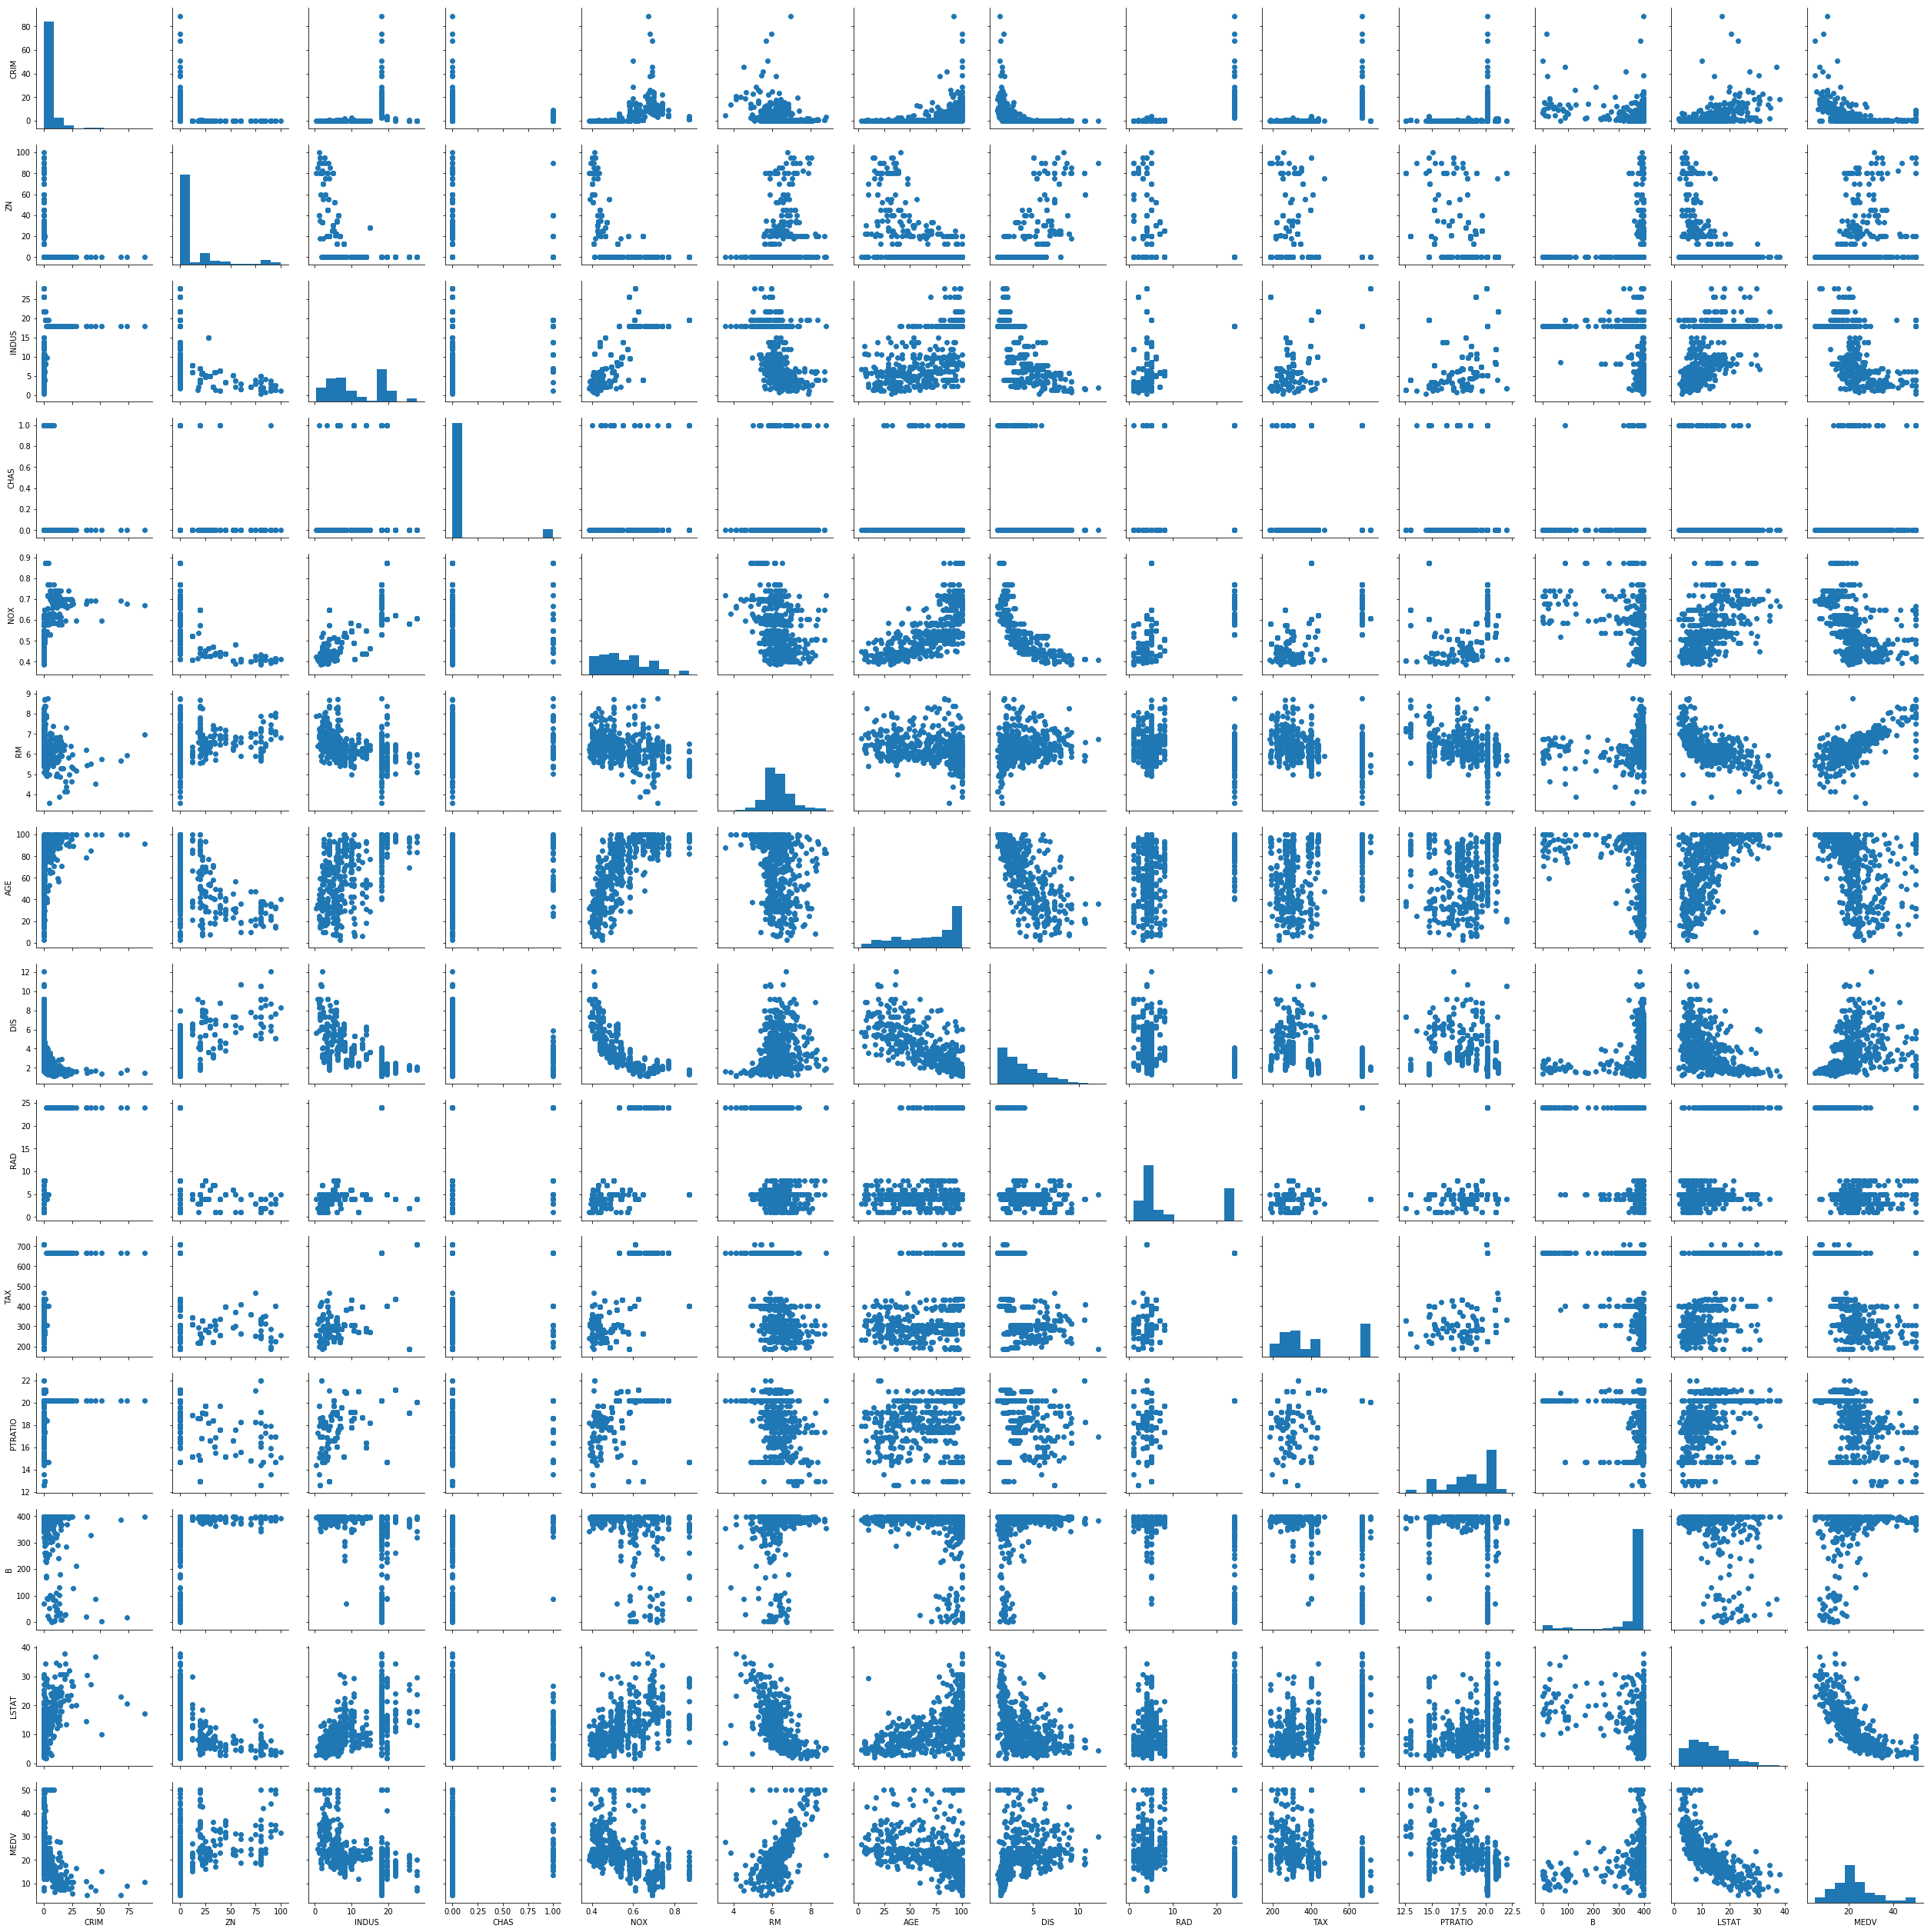

In [19]:

g = sns.PairGrid(boston)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

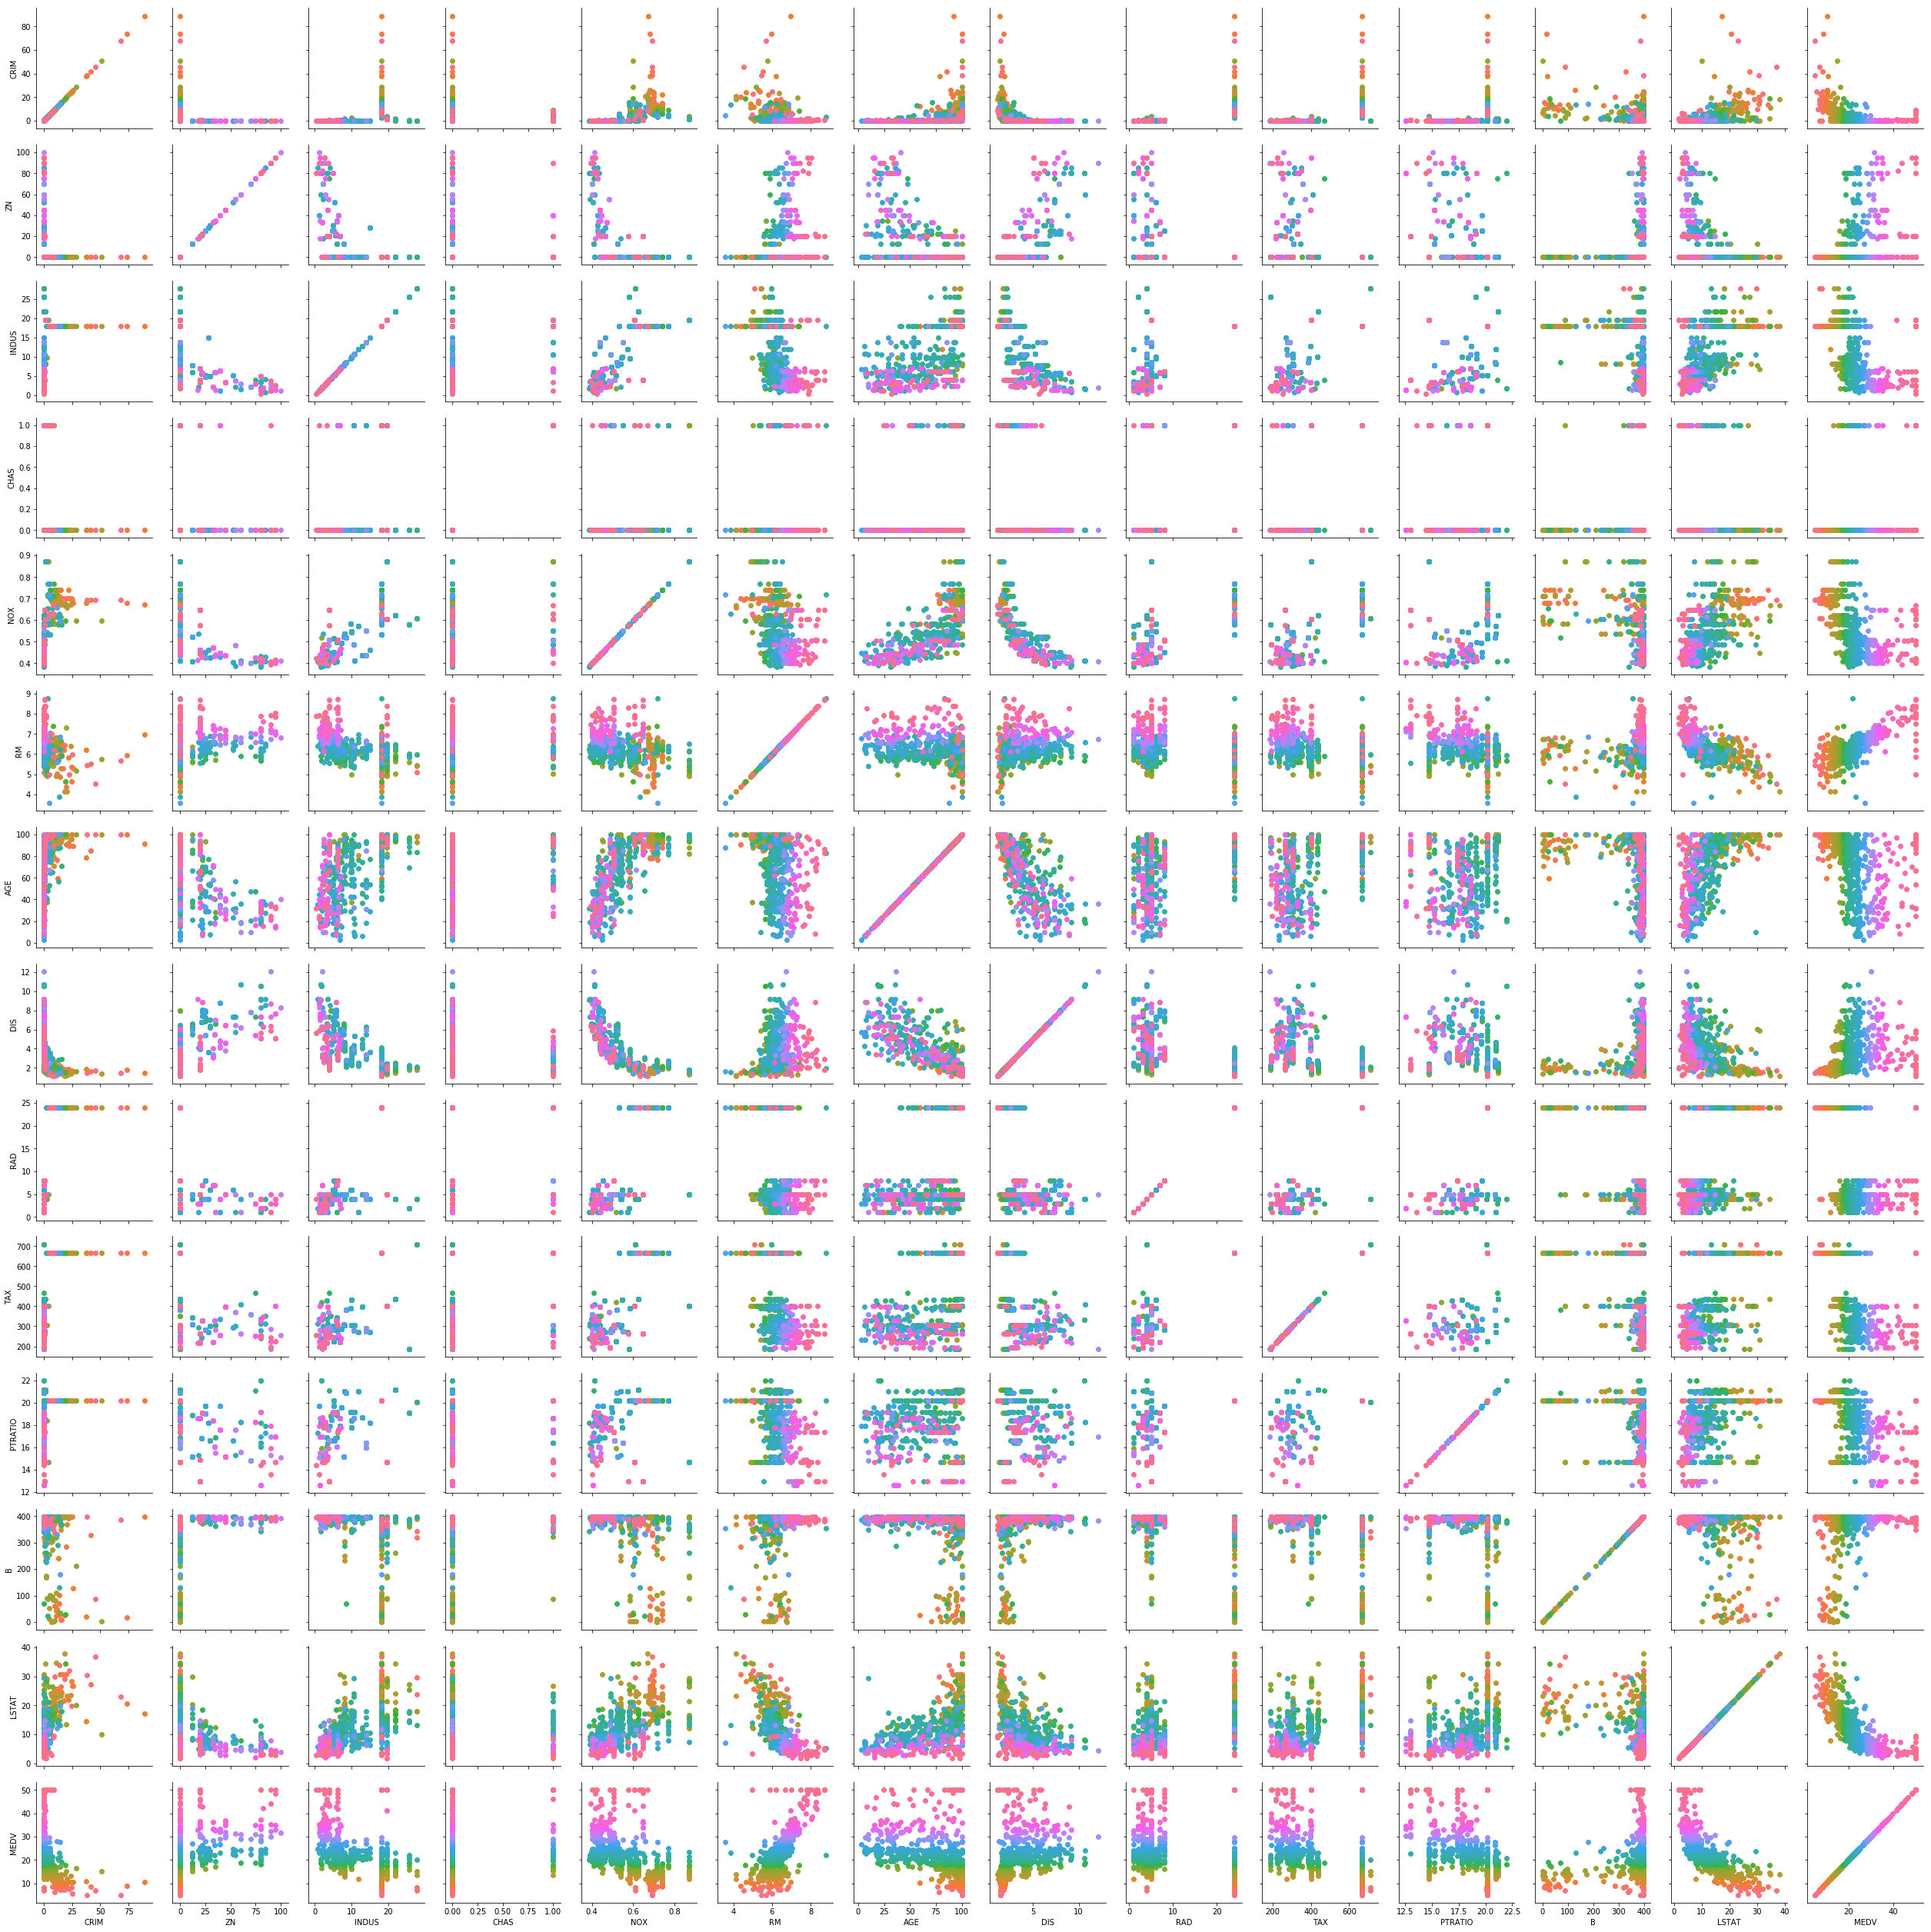

In [20]:
g = sns.PairGrid(boston, hue="MEDV")
g.map(plt.scatter)

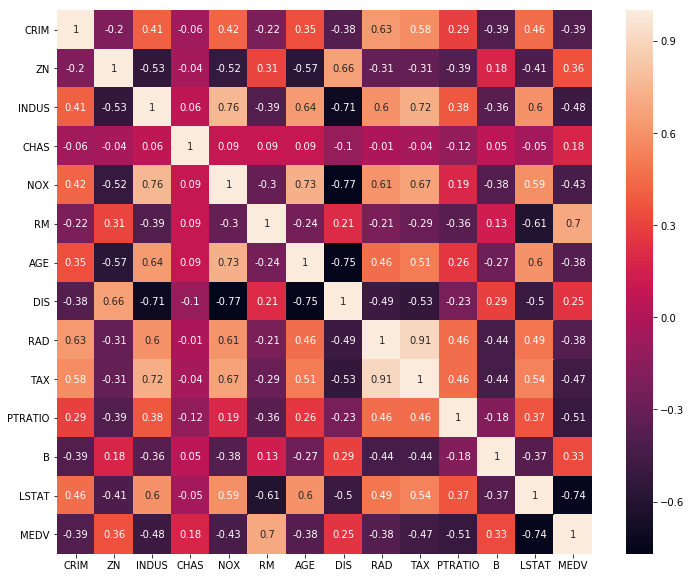

In [21]:
correlation_matrix = boston.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

#### Lets take a look at the above correlation matrix

A correlation matrix shows us the relationship between the data.
The closer a number on the correlation matrix is to 1 the closer / stronger the relationship of the 2 sets of data.
We see then if it is a possitive or negative relationship by the number being positive or negative.

The above correlation matrix is very interesting.

There are a number of very strong relationships in this dataset, both positive and negative correlations.
The strong positive realationships are RM and MEDV, INDUS and NOX, NOX and AGE, TAX and INDUS, RAD and TAX

On the other end of the correlation there are a number of very negative relationship values.
The strong negative realationships are LSTAT and MEDV, RM and LSTAT.


* It is very interesting to see that the Nox (air quality) is closely related to the INDUS, a .76 correlation.  This makes sense that there would be poorer air quality where there is industry.

* The highest positive correlation between values is .91 which is the relation between RAD the index of accessibility to radial highways and TAX the full-value property-tax rate per $10,000.

* The negative correlation of -.74 between LSTAT and MEDV also makes sense, Where the population is made up of more affluent families it makes sense that the median house price values are higher.

Looking at the matrix for the relationships of the Charles River (CHAS), we quickly see that it is not closely related at all to any of the data.  The highest correlation value with CHAS is 0.18 with MEDV or -0.12 with PTRATIO. 

Again looking at MEDV the strongest relationship on the correlation matrix is a positive 0.7 with RM and a negative -.74 with LSTAT.

Other datapoints that show correlation with MEDV are INDUS at -.48, NOX at -.43, TAX at -.47 and PTRATIO at -.51.



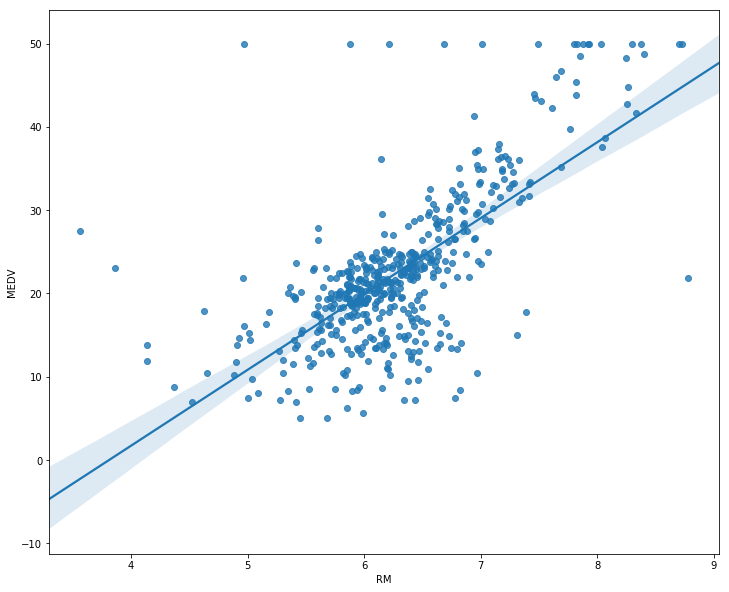

In [22]:
sns.regplot(x="RM", y="MEDV", data=boston)

In general as you increase the number of rooms in a dwelling the price increases.  The number of houses I referenced earlier at 50,000 are outliers here at least in the 5 - 7 room range.

This positive relationship can be seen here in the main moving upwards from left to right on the above plot.

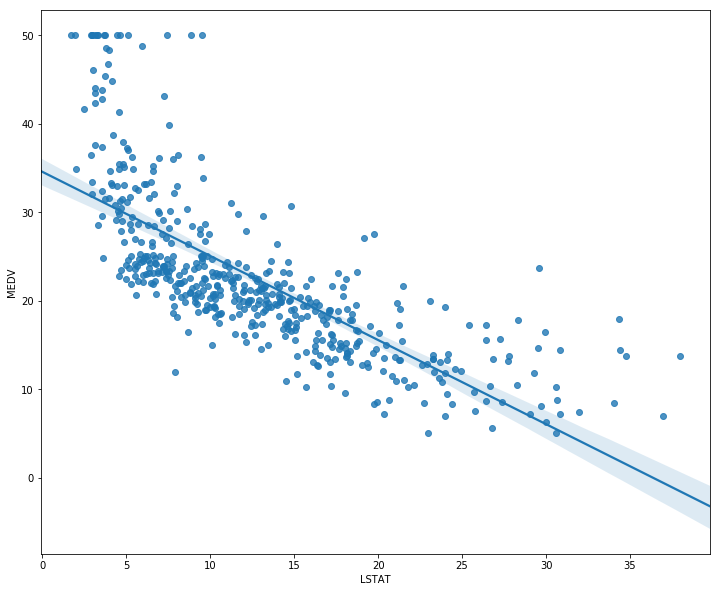

In [23]:
sns.regplot(x="LSTAT", y="MEDV", data=boston)

From "Hedonic housing prices and the demand for clean air." by Harrison Jr, David, and Daniel L. Rubinfeld. I found that LSTAT is the proportion of adults without, some high school education and proportion of male workers classified as labourers.

From looking a the above plot it make sense that in general a lower income household would have a lower priced house.

In general on the above plot you can see the negative correlation as the house prices move down from left to right.

## Inferential

Using the plots created above and this time including the Charles River attribute to see if it has any effect on the data.

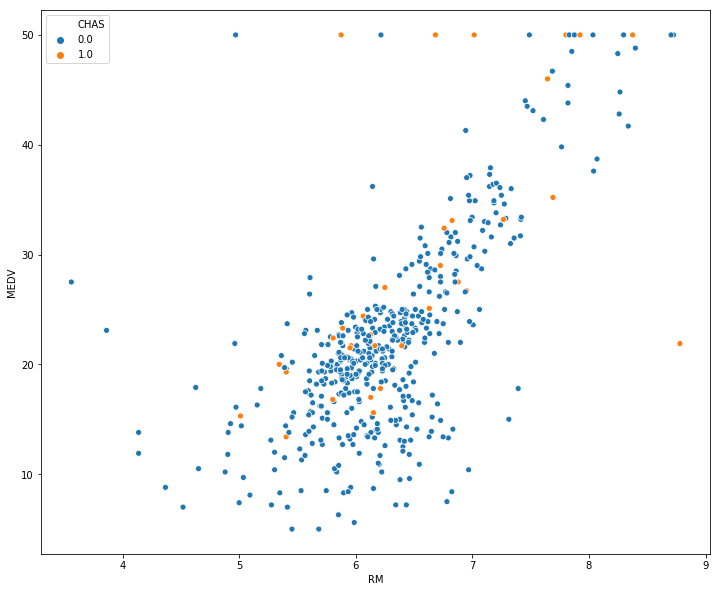

In [24]:
# create scatter plot
sns.scatterplot(data=boston,x='RM',y='MEDV', hue='CHAS')

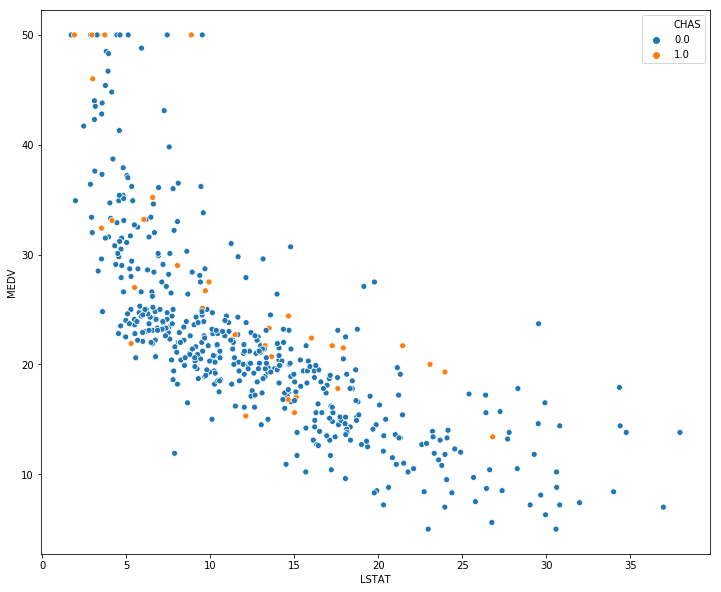

In [25]:
# create scatter plot
sns.scatterplot(data=boston,x='LSTAT',y='MEDV', hue='CHAS')

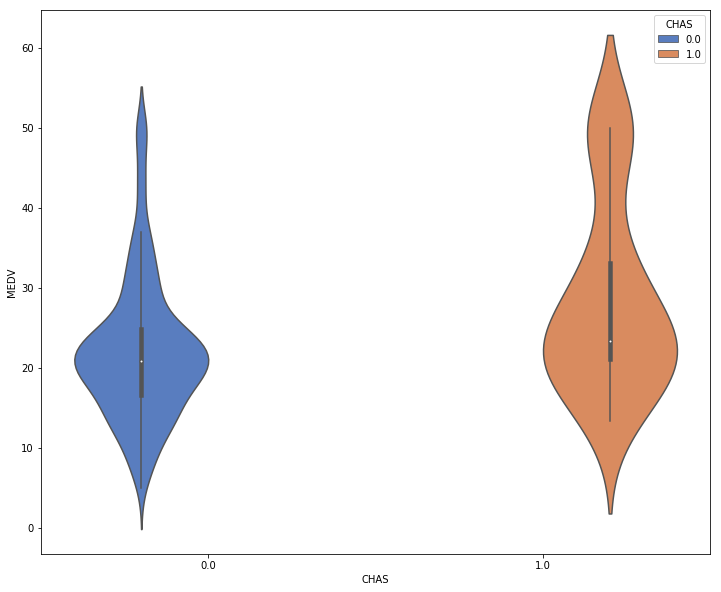

In [26]:
#https://seaborn.pydata.org/generated/seaborn.violinplot.html#seaborn.violinplot

sns.violinplot(x="CHAS", y="MEDV", hue="CHAS", data=boston, palette="muted")

From a cursory glance at the violin plots above, it looks like there is a general look of slightly higher prices for suburbs bordering the Charles River.  We can do a t test to see if the medians of both are the same or not.  It is a little clearer on the box plot below.  The median line is slightly higher bordering the Charles River.  You can also see that the there are outlier in the box plot not bordering the Charles River meaning that 99.7% of the data is within the whiskers and this brings it well below the plot of bordering the Charles River.

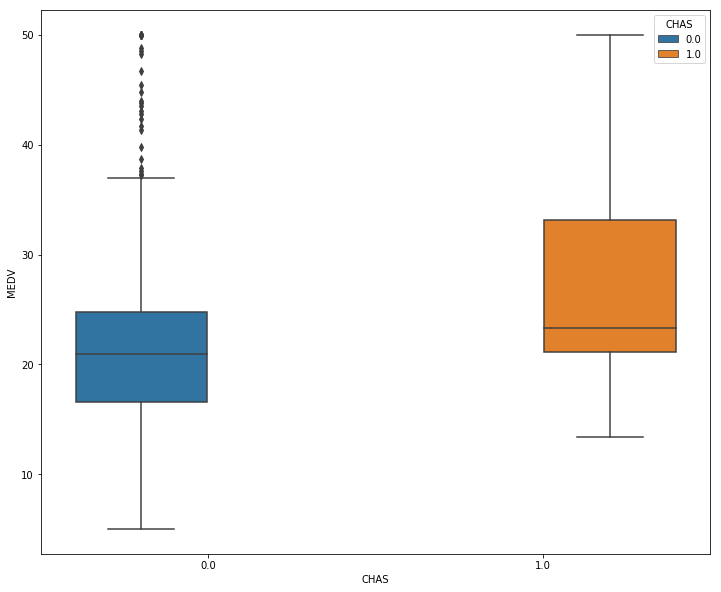

In [27]:
sns.boxplot(x="CHAS", y="MEDV", hue='CHAS', data=boston)

### T test
A t test is an inferential statistic that checks if the medians of 2 sets of data are the same.  The null hypothesis is that the 2 means are the same.  We reject the null hypothesis if the t test shows that the 2 means are staistically significantly different.



In [49]:
# splitting the boston dataframe into suburbs that are on the river Charles

on_river_df = boston[boston['CHAS']==1]

# on_river_df['MEDV']
# on_river_df.describe()

In [51]:
# splitting the boston dataframe into suburbs that are not on the river Charles

other_suburbs_df = boston[boston['CHAS']==0]

# other_suburbs_df['MEDV']
# other_suburbs_df.describe()

In [52]:
# https://en.wikipedia.org/wiki/Student%27s_t-test#Independent_two-sample_t-test

ss.ttest_ind(on_river_df['MEDV'], other_suburbs_df['MEDV'])

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

In [54]:
#https://en.wikipedia.org/wiki/Welch%27s_t-test

ss.ttest_ind(on_river_df['MEDV'], other_suburbs_df['MEDV'], equal_var = False)

Ttest_indResult(statistic=3.113291312794837, pvalue=0.003567170098137517)

## Predictive

I have included a simple model of an neural network, you have input layers and 2 hidden layers with an output layer.

You can clearly see that each neuron at each level is connected to all neurons at the next level.  The model can get very complex very quickly.

![alt text](neural_network.png "neural_network")


## Preparing

In [55]:
# splitting the datarame into input and output
x = boston[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
y = boston[['MEDV']]

In [56]:
x_train, x_test, y_train, y_test = mod.train_test_split(x, y, test_size=0.3)

## Building and Training

In [57]:
m = kr.models.Sequential()


m.add(kr.layers.Dense(130, input_dim=13, activation="relu"))
m.add(kr.layers.Dense(60, activation="relu"))
#m.add(kr.layers.Dense(65,  activation="sigmoid"))
m.add(kr.layers.Dense(60, activation="relu"))
m.add(kr.layers.Dense(30,  activation="relu"))
m.add(kr.layers.Dense(1, activation="linear"))

m.compile(loss="mean_squared_error", optimizer="adam", metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [58]:
#history = m.fit(x_train, y_train, validation_data=(x_test,y_test),epochs=500, batch_size=10, verbose=1)

history = m.fit(x_train, y_train, validation_split=0.25,epochs=100, batch_size=10, verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 265 samples, validate on 89 samples
Epoch 1/100
265/265 [==============================] - 1s 3ms/step - loss: 212.0335 - accuracy: 0.0000e+00 - val_loss: 122.7574 - val_accuracy: 0.0000e+00
Epoch 2/100
265/265 [==============================] - 0s 203us/step - loss: 58.1572 - accuracy: 0.0075 - val_loss: 104.2364 - val_accuracy: 0.0112
Epoch 3/100
265/265 [==============================] - 0s 373us/step - loss: 53.8588 - accuracy: 0.0075 - val_loss: 97.3917 - val_accuracy: 0.0000e+00
Epoch 4/100
265/265 [==============================] - 0s 207us/step - loss: 54.5206 - accuracy: 0.0151 - val_loss: 108.0789 - val_accuracy: 0.0000e+00
Epoch 5/100
265/265 [==============================] - 0s 230us/step - loss: 55.5655 - accuracy: 0.0075 - val_loss: 101.2782 - val_accuracy: 0.0000e+00
Epoch 6/100
265/265 [==============================] - 0s 192us/step - loss: 52.7432 - accuracy: 0.0038 - val_loss: 98.6040 - val_accuracy: 0.0000e+0

265/265 [==============================] - 0s 139us/step - loss: 15.7878 - accuracy: 0.0038 - val_loss: 38.9559 - val_accuracy: 0.0000e+00
Epoch 54/100
265/265 [==============================] - 0s 132us/step - loss: 18.9137 - accuracy: 0.0075 - val_loss: 56.7520 - val_accuracy: 0.0000e+00
Epoch 55/100
265/265 [==============================] - 0s 128us/step - loss: 16.9931 - accuracy: 0.0113 - val_loss: 37.2640 - val_accuracy: 0.0000e+00
Epoch 56/100
265/265 [==============================] - 0s 124us/step - loss: 16.7693 - accuracy: 0.0113 - val_loss: 44.7081 - val_accuracy: 0.0112
Epoch 57/100
265/265 [==============================] - 0s 124us/step - loss: 17.9294 - accuracy: 0.0151 - val_loss: 54.2475 - val_accuracy: 0.0112
Epoch 58/100
265/265 [==============================] - 0s 135us/step - loss: 18.1936 - accuracy: 0.0151 - val_loss: 37.4618 - val_accuracy: 0.0225
Epoch 59/100
265/265 [==============================] - 0s 120us/step - loss: 13.6086 - accuracy: 0.0151 - val_lo

In [59]:
m.predict(x_test).round().T 

array([[24., 28., 27., 12., 21., 10., 23., 30., 26., 11., 22., 26., 27.,
        25., 28., 20., 18., 21., 14., 33., 21., 23., 11., 16., 24., 10.,
        25., 28., 35., 23., 24., 17., 25., 20., 18., 22., 18., 13., 18.,
        19., 21., 26., 25., 34., 11., 32., 37., 29., 23., 29., 48., 13.,
        27., 23., 25., 46., 43., 53., 25., 24., 23., 24., 26., 17., 23.,
        23., 23., 36., 27., 21., 21., 13., 12., 31., 27., 27., 35., 16.,
        15., 23., 26., 17., 27., 34., 30., 26., 25., 30., 31., 27., 24.,
        24., 37., 24., 24., 21., 21., 20., 26., 22., 22., 26., 14., 25.,
        17., 29., 22., 23., 32., 29., 21., 16., 24., 24., 26., 21., 20.,
        17., 13., 17., 17., 11., 25., 20., 31., 15., 18., 25., 18., 26.,
        26., 27., 24., 23., 24., 13., 30., 17., 20., 29., 29., 23., 32.,
        29., 24., 38., 23., 19., 13., 30., 16., 23.]], dtype=float32)

In [60]:
y_test.as_matrix().astype(np.float32)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[21.7],
       [23. ],
       [25. ],
       [ 8.3],
       [22.3],
       [ 7. ],
       [21.4],
       [33.2],
       [22.2],
       [ 5. ],
       [23.2],
       [22.9],
       [21.9],
       [23.1],
       [29.1],
       [19.9],
       [16.7],
       [17.2],
       [13.5],
       [36.5],
       [20.1],
       [18.9],
       [ 5. ],
       [13.8],
       [16.6],
       [ 8.8],
       [27.5],
       [22.8],
       [35.4],
       [19.8],
       [22.8],
       [13.1],
       [20.3],
       [16.5],
       [17.8],
       [16.8],
       [16.4],
       [11.3],
       [12.7],
       [21.9],
       [19.5],
       [22.6],
       [29. ],
       [32.4],
       [12. ],
       [31.1],
       [50. ],
       [25. ],
       [22.2],
       [26.6],
       [37.9],
       [10.9],
       [22.6],
       [21. ],
       [20.6],
       [32.5],
       [31.6],
       [50. ],
       [19.3],
       [28.4],
       [20.3],
       [16.2],
       [22. ],
       [23.2],
       [21.7],
       [15.6],
       [18

In [61]:
m.evaluate(x_test, y_test)

152/152 [==============================] - 0s 33us/step


[22.672381652028935, 0.00657894741743803]

In [62]:
reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [63]:
print(reg.coef_)

[[-6.02347560e-02  3.95061600e-02  6.20830654e-02  2.94557354e+00
  -1.84999186e+01  4.24396970e+00 -1.16666468e-02 -1.41808911e+00
   2.52249193e-01 -1.09372624e-02 -9.37576858e-01  1.11763513e-02
  -5.08541560e-01]]


In [64]:
y_pred = reg.predict(x_test)
print(y_pred)

[[21.13641367]
 [24.20604033]
 [25.5107813 ]
 [13.25030407]
 [26.7914497 ]
 [-3.71854898]
 [24.64807432]
 [36.19384277]
 [25.86449702]
 [10.65148054]
 [22.50118361]
 [29.28822037]
 [24.14789754]
 [24.46119359]
 [30.53854334]
 [18.45410504]
 [19.3950897 ]
 [15.1227682 ]
 [12.07061156]
 [35.27361345]
 [19.00870508]
 [18.70515651]
 [ 7.62874028]
 [15.91614669]
 [17.9692981 ]
 [ 2.90684974]
 [12.60206023]
 [25.47135592]
 [34.54189674]
 [22.50179488]
 [26.6614031 ]
 [20.20841775]
 [23.43312359]
 [11.15291755]
 [22.75599973]
 [20.31751994]
 [18.74371569]
 [13.03416676]
 [11.1859288 ]
 [14.4347977 ]
 [18.17531397]
 [26.05830752]
 [31.85477378]
 [36.59770138]
 [11.38650202]
 [32.68414466]
 [40.30819511]
 [28.91391473]
 [24.14676434]
 [29.05228213]
 [33.55212525]
 [18.82882889]
 [24.95242776]
 [21.55364669]
 [22.42941002]
 [30.38559973]
 [32.8256284 ]
 [41.44126911]
 [22.34916697]
 [28.71556295]
 [19.99428284]
 [20.32329301]
 [27.68149827]
 [17.07989938]
 [23.61121245]
 [15.45367109]
 [18.27643

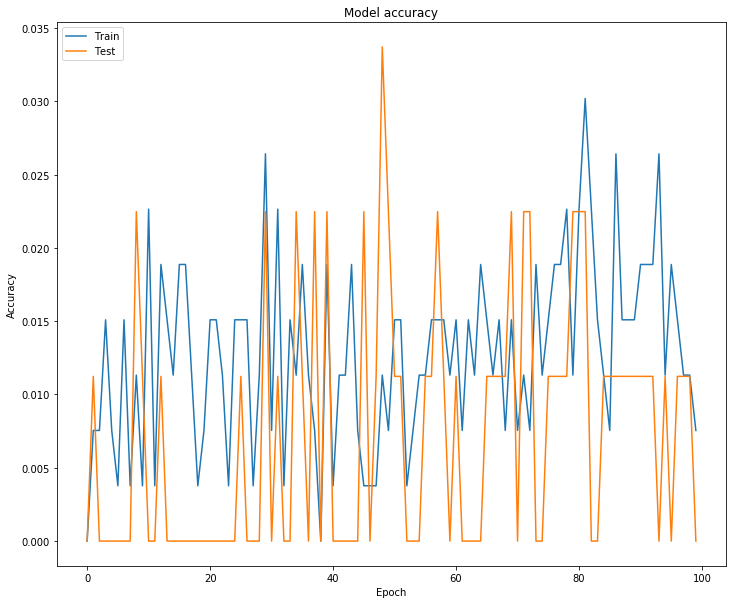

In [65]:
# https://keras.io/visualization/

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

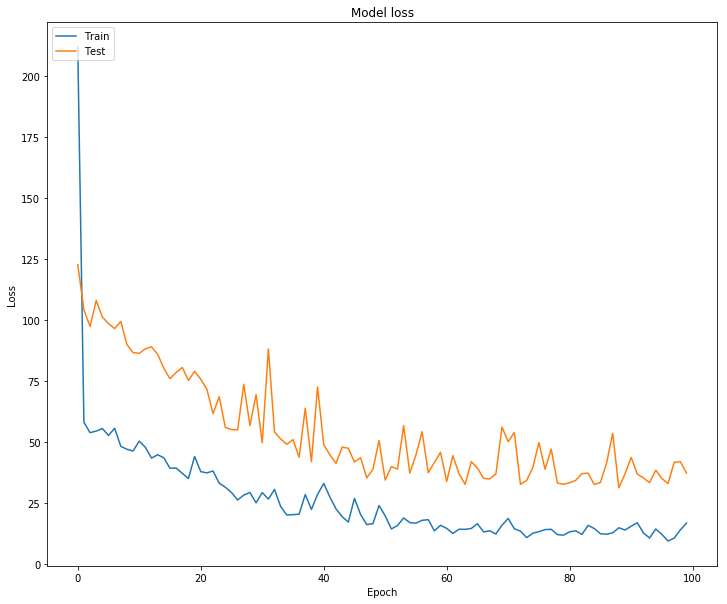

In [66]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

There is a danger of overfitting when using neural networks.  Overfitting is when your neural network is learning the training data really well but is not then able to generalise to fit the test data.  As you can see above the loss value is increasing and is not getting any better.

There is a function described in the Keras documentation of stopping the epochs early if the loos is now increasing.

https://keras.io/callbacks/

In [67]:
x1 = boston[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
y1 = boston[['MEDV']]

In [68]:
x1_train, x1_test, y1_train, y1_test = mod.train_test_split(x1, y1, test_size=0.3)

In [69]:
m = kr.models.Sequential()


m.add(kr.layers.Dense(130, input_dim=13, activation="relu"))
m.add(kr.layers.Dense(60, activation="relu"))
#m.add(kr.layers.Dense(65,  activation="sigmoid"))
m.add(kr.layers.Dense(60, activation="relu"))
m.add(kr.layers.Dense(30,  activation="relu"))
m.add(kr.layers.Dense(1, activation="linear"))

m.compile(loss="mean_squared_error", optimizer="adam", metrics=['accuracy'])

In [70]:
early_stop = kr.callbacks.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto', baseline=None, restore_best_weights=False)

history = m.fit(x1_train, y1_train, callbacks=[early_stop], validation_split=0.2,epochs=100, batch_size=10, verbose=1)

Train on 283 samples, validate on 71 samples
Epoch 1/100
283/283 [==============================] - 0s 1ms/step - loss: 79.9729 - accuracy: 0.0035 - val_loss: 47.5938 - val_accuracy: 0.0141
Epoch 2/100
283/283 [==============================] - 0s 159us/step - loss: 72.2925 - accuracy: 0.0071 - val_loss: 40.4798 - val_accuracy: 0.0000e+00
Epoch 3/100
283/283 [==============================] - 0s 123us/step - loss: 65.2596 - accuracy: 0.0035 - val_loss: 36.8183 - val_accuracy: 0.0000e+00
Epoch 4/100
283/283 [==============================] - 0s 162us/step - loss: 59.1529 - accuracy: 0.0000e+00 - val_loss: 45.5910 - val_accuracy: 0.0000e+00
Epoch 5/100
283/283 [==============================] - 0s 155us/step - loss: 63.3310 - accuracy: 0.0106 - val_loss: 34.5935 - val_accuracy: 0.0000e+00
Epoch 6/100
283/283 [==============================] - 0s 159us/step - loss: 56.3782 - accuracy: 0.0035 - val_loss: 35.8507 - val_accuracy: 0.0141
Epoch 7/100
283/283 [==============================] - 

In [71]:
m.predict(x1_test).round().T

array([[44., 19., 36., 19., 28., 13., 23., 19., 30., 27., 21., 15., 27.,
        11., 18., 24., 25., 14., 23., 39., 27., 15., 28., 29., 30., 22.,
        28., 21., 23., 25., 47., 48., 30., 15., 22., 27., 26., 36., 33.,
        33., 28., 39., 15., 12., 30., 27., 20., 16., 16., 35., 32., 32.,
        30., 23., 15., 30., 25., 15., 16., 33., 28., 36., 16., 43., 27.,
        19., 32., 30., 14., 15., 43., 34., 25., 23., 32., 27., 20., 36.,
        30., 14., 17., 19., 22., 15., 36., 17., 35., 33., 17., 18., 29.,
        22., 17., 16., 28., 41., 12., 17., 25., 13., 24., 26., 13., 22.,
        18., 28., 11., 13., 29., 23., 19., 22., 15., 44., 14., 20., 42.,
        20., 32., 22., 30., 33., 37., 15., 19., 41., 37., 27., 35., 33.,
        16., 22., 25., 31., 27., 26., 41., 17., 26., 31., 45., 42., 44.,
        13., 21., 30., 29., 26., 27., 13., 42., 23.]], dtype=float32)

In [72]:
y1_test.as_matrix().astype(np.float32)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[41.7],
       [15.2],
       [35.2],
       [14.5],
       [19.2],
       [ 8.3],
       [20.1],
       [22.5],
       [22.7],
       [20.3],
       [16.1],
       [ 9.7],
       [19.9],
       [ 8.5],
       [17.1],
       [22.6],
       [21.9],
       [ 5.6],
       [23.2],
       [27. ],
       [21. ],
       [ 8.3],
       [28.7],
       [23. ],
       [11.9],
       [21.2],
       [25.3],
       [19.6],
       [22.9],
       [21.8],
       [50. ],
       [50. ],
       [23.2],
       [16.5],
       [20. ],
       [19.4],
       [19. ],
       [23.5],
       [23.9],
       [26.5],
       [26.4],
       [36.4],
       [15.7],
       [ 8.4],
       [26.6],
       [23.2],
       [21.7],
       [20.4],
       [10.9],
       [32. ],
       [22. ],
       [50. ],
       [21.6],
       [21. ],
       [10.5],
       [32.2],
       [19.5],
       [12.7],
       [15.6],
       [20.8],
       [19.8],
       [29.8],
       [14. ],
       [34.9],
       [21.1],
       [17.4],
       [26

In [73]:
m.evaluate(x1_test, y1_test)

152/152 [==============================] - 0s 33us/step


[36.10337849667198, 0.019736841320991516]

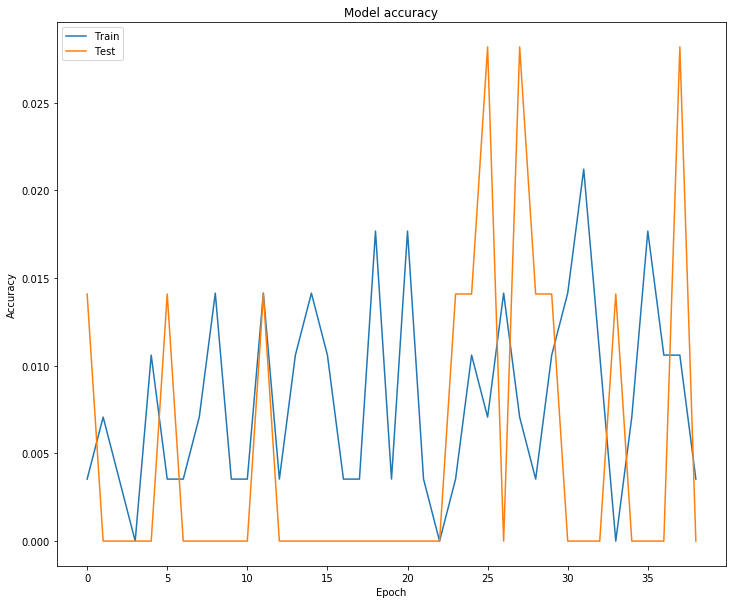

In [74]:
# https://keras.io/visualization/

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

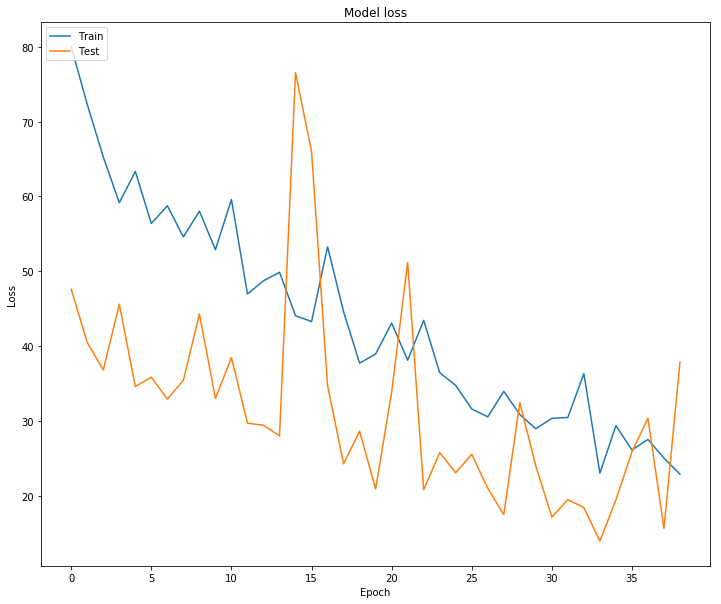

In [75]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

There are a couple of things I can do to help reduce the loss and increase the accuracy without overfitting.  I have reduced the size of the neural network and now I want to try to scale and whiten the data.  

It is nothing to do with a trip to the dentist and so should not hurt.

Scaling the data means normalising the data, ie taking the correlations away so that there is no links between the data.  This however means that I need to be more careful about the columns I include. I may have to later only use some columns rather than all the data as I am doing currently.

## Scaling

In [76]:
# https://scikit-learn.org/stable/modules/preprocessing.html
boston_scaled = pd.DataFrame(pre.scale(boston), columns = boston.columns)
boston_scaled

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,0.159686
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,-0.101524
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,1.324247
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,1.182758
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,1.487503
5,-0.417044,-0.487722,-1.306878,-0.272599,-0.835284,0.207096,-0.351157,1.077737,-0.752922,-1.106115,0.113032,0.410571,-1.043322,0.671222
6,-0.410243,0.048772,-0.476654,-0.272599,-0.265154,-0.388411,-0.070229,0.839244,-0.523001,-0.577519,-1.505237,0.426798,-0.031268,0.039964
7,-0.403696,0.048772,-0.476654,-0.272599,-0.265154,-0.160466,0.978808,1.024638,-0.523001,-0.577519,-1.505237,0.441052,0.910700,0.497082
8,-0.395935,0.048772,-0.476654,-0.272599,-0.265154,-0.931206,1.117494,1.087196,-0.523001,-0.577519,-1.505237,0.328448,2.421774,-0.656595
9,-0.400729,0.048772,-0.476654,-0.272599,-0.265154,-0.399808,0.616090,1.329635,-0.523001,-0.577519,-1.505237,0.329325,0.623344,-0.395385


In [77]:
boston_scaled.mean()

CRIM      -8.513173e-17
ZN         3.306534e-16
INDUS      2.804081e-16
CHAS      -3.100287e-16
NOX       -8.071058e-16
RM        -5.189086e-17
AGE       -2.650493e-16
DIS        8.293761e-17
RAD        1.514379e-15
TAX       -9.934960e-16
PTRATIO    4.493551e-16
B         -1.451408e-16
LSTAT     -1.595123e-16
MEDV      -4.247810e-16
dtype: float64

In [78]:
boston_scaled.std()

CRIM       1.00099
ZN         1.00099
INDUS      1.00099
CHAS       1.00099
NOX        1.00099
RM         1.00099
AGE        1.00099
DIS        1.00099
RAD        1.00099
TAX        1.00099
PTRATIO    1.00099
B          1.00099
LSTAT      1.00099
MEDV       1.00099
dtype: float64

In [79]:
scaler = pre.StandardScaler()
scaler.fit(boston)
scaler.mean_, scaler.scale_

(array([3.61352356e+00, 1.13636364e+01, 1.11367787e+01, 6.91699605e-02,
        5.54695059e-01, 6.28463439e+00, 6.85749012e+01, 3.79504269e+00,
        9.54940711e+00, 4.08237154e+02, 1.84555336e+01, 3.56674032e+02,
        1.26530632e+01, 2.25328063e+01]),
 array([8.59304135e+00, 2.32993957e+01, 6.85357058e+00, 2.53742935e-01,
        1.15763115e-01, 7.01922514e-01, 2.81210326e+01, 2.10362836e+00,
        8.69865112e+00, 1.68370495e+02, 2.16280519e+00, 9.12046075e+01,
        7.13400164e+00, 9.18801155e+00]))

In [80]:
boston.std()

CRIM         8.601545
ZN          23.322453
INDUS        6.860353
CHAS         0.253994
NOX          0.115878
RM           0.702617
AGE         28.148861
DIS          2.105710
RAD          8.707259
TAX        168.537116
PTRATIO      2.164946
B           91.294864
LSTAT        7.141062
MEDV         9.197104
dtype: float64

In [81]:
boston_scaled = pd.DataFrame(scaler.transform(boston), columns = boston.columns)
boston_scaled

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,0.159686
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,-0.101524
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,1.324247
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,1.182758
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,1.487503
5,-0.417044,-0.487722,-1.306878,-0.272599,-0.835284,0.207096,-0.351157,1.077737,-0.752922,-1.106115,0.113032,0.410571,-1.043322,0.671222
6,-0.410243,0.048772,-0.476654,-0.272599,-0.265154,-0.388411,-0.070229,0.839244,-0.523001,-0.577519,-1.505237,0.426798,-0.031268,0.039964
7,-0.403696,0.048772,-0.476654,-0.272599,-0.265154,-0.160466,0.978808,1.024638,-0.523001,-0.577519,-1.505237,0.441052,0.910700,0.497082
8,-0.395935,0.048772,-0.476654,-0.272599,-0.265154,-0.931206,1.117494,1.087196,-0.523001,-0.577519,-1.505237,0.328448,2.421774,-0.656595
9,-0.400729,0.048772,-0.476654,-0.272599,-0.265154,-0.399808,0.616090,1.329635,-0.523001,-0.577519,-1.505237,0.329325,0.623344,-0.395385


In [82]:
encoder = pre.OneHotEncoder()
encoder.fit(boston)
encoder

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values=None, sparse=True)

In [83]:
x_scaled = boston_scaled[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
y_scaled = boston_scaled[['MEDV']]

In [84]:
x_scaled_train, x_scaled_test, y_scaled_train, y_scaled_test = mod.train_test_split(x_scaled, y_scaled, test_size=0.3)

In [85]:
m = kr.models.Sequential()


m.add(kr.layers.Dense(130, input_dim=13, activation="relu"))
m.add(kr.layers.Dense(60, activation="relu"))
#m.add(kr.layers.Dense(65,  activation="sigmoid"))
m.add(kr.layers.Dense(60, activation="relu"))
m.add(kr.layers.Dense(30,  activation="relu"))
m.add(kr.layers.Dense(1, activation="linear"))

m.compile(loss="mean_squared_error", optimizer="adam", metrics=['accuracy'])

In [86]:
history = m.fit(x_scaled_train, y_scaled_train, validation_split=0.25,epochs=100, batch_size=10, verbose=1)

Train on 265 samples, validate on 89 samples
Epoch 1/100
265/265 [==============================] - 0s 1ms/step - loss: 0.7167 - accuracy: 0.0000e+00 - val_loss: 0.3561 - val_accuracy: 0.0000e+00
Epoch 2/100
265/265 [==============================] - 0s 154us/step - loss: 0.3052 - accuracy: 0.0000e+00 - val_loss: 0.1518 - val_accuracy: 0.0000e+00
Epoch 3/100
265/265 [==============================] - 0s 241us/step - loss: 0.1602 - accuracy: 0.0000e+00 - val_loss: 0.1205 - val_accuracy: 0.0000e+00
Epoch 4/100
265/265 [==============================] - 0s 162us/step - loss: 0.1255 - accuracy: 0.0000e+00 - val_loss: 0.1002 - val_accuracy: 0.0000e+00
Epoch 5/100
265/265 [==============================] - 0s 192us/step - loss: 0.0966 - accuracy: 0.0000e+00 - val_loss: 0.1227 - val_accuracy: 0.0000e+00
Epoch 6/100
265/265 [==============================] - 0s 196us/step - loss: 0.1007 - accuracy: 0.0000e+00 - val_loss: 0.1141 - val_accuracy: 0.0000e+00
Epoch 7/100
265/265 [==================

Epoch 54/100
265/265 [==============================] - 0s 132us/step - loss: 0.0128 - accuracy: 0.0000e+00 - val_loss: 0.0788 - val_accuracy: 0.0000e+00
Epoch 55/100
265/265 [==============================] - 0s 139us/step - loss: 0.0108 - accuracy: 0.0000e+00 - val_loss: 0.0747 - val_accuracy: 0.0000e+00
Epoch 56/100
265/265 [==============================] - 0s 132us/step - loss: 0.0110 - accuracy: 0.0000e+00 - val_loss: 0.0817 - val_accuracy: 0.0000e+00
Epoch 57/100
265/265 [==============================] - 0s 139us/step - loss: 0.0125 - accuracy: 0.0000e+00 - val_loss: 0.0702 - val_accuracy: 0.0000e+00
Epoch 58/100
265/265 [==============================] - 0s 135us/step - loss: 0.0113 - accuracy: 0.0000e+00 - val_loss: 0.0734 - val_accuracy: 0.0000e+00
Epoch 59/100
265/265 [==============================] - 0s 143us/step - loss: 0.0131 - accuracy: 0.0000e+00 - val_loss: 0.0753 - val_accuracy: 0.0000e+00
Epoch 60/100
265/265 [==============================] - 0s 139us/step - loss

In [87]:
m.predict(x_scaled_test).round().T 

array([[-0., -1.,  1., -0.,  0., -0.,  1., -0., -1.,  1., -0.,  1.,  0.,
        -0.,  0., -0., -0., -0., -0., -0.,  1.,  2.,  0., -0., -0.,  0.,
        -1.,  0.,  0., -0., -1., -0.,  2.,  1., -1.,  0., -2., -1., -0.,
         0., -1.,  0., -1.,  0., -0., -1.,  2.,  0.,  0., -1.,  1., -0.,
        -0., -1., -0.,  0.,  0., -0., -0., -0.,  0.,  0., -0.,  0., -0.,
         0.,  2., -0., -1.,  1., -0., -0., -1., -0.,  2.,  0., -1., -0.,
        -1.,  1., -0., -0., -0.,  3., -1., -0., -0.,  1.,  1., -0.,  1.,
        -1.,  2.,  1.,  1.,  0., -0.,  1., -1., -0.,  2., -1.,  1., -0.,
        -0.,  1.,  0., -0.,  0.,  1., -0., -1.,  0., -0.,  0.,  0.,  4.,
        -1., -1., -0.,  1., -0.,  3., -0., -0., -0., -0.,  2.,  1., -1.,
         1., -0., -2., -0., -0.,  1., -0., -0.,  3.,  2.,  0., -0., -0.,
        -1., -0., -0., -1.,  0.,  0.,  0.,  0., -1.]], dtype=float32)

In [88]:
y_scaled_test.as_matrix().astype(np.float32)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[-0.41715297],
       [-0.84161913],
       [ 0.8235943 ],
       [-0.12329178],
       [-0.0362218 ],
       [-0.29743174],
       [ 1.3786654 ],
       [-0.8960379 ],
       [-0.4715717 ],
       [ 0.84536177],
       [-0.286548  ],
       [ 1.052153  ],
       [-0.19947802],
       [-0.5586417 ],
       [ 0.24675564],
       [-0.41715297],
       [-0.79808414],
       [ 0.2141044 ],
       [-1.0919453 ],
       [-0.68924665],
       [ 1.5745729 ],
       [ 1.5963404 ],
       [ 0.2358719 ],
       [-0.21036176],
       [-0.37361798],
       [ 0.18145315],
       [-0.86338663],
       [-0.19947802],
       [ 0.26852313],
       [-0.62394416],
       [-0.8742704 ],
       [-0.5912929 ],
       [ 1.3460141 ],
       [ 1.4875029 ],
       [-1.0266428 ],
       [-0.21036176],
       [-1.3205041 ],
       [-1.5490627 ],
       [-0.40626922],
       [ 0.14880191],
       [-1.1572478 ],
       [ 0.24675564],
       [-0.31919923],
       [ 0.22498815],
       [-0.7436654 ],
       [-0

In [89]:
m.evaluate(x_scaled_test, y_scaled_test)

152/152 [==============================] - 0s 33us/step


[0.1532700516675648, 0.0]

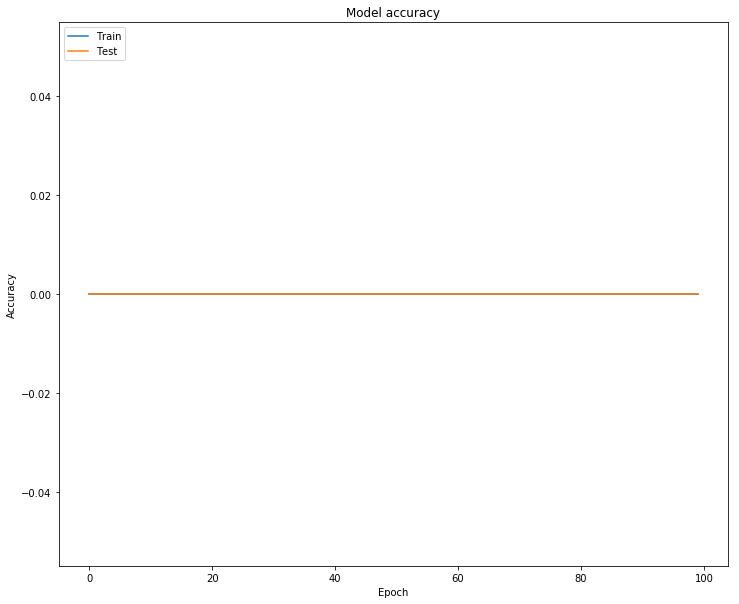

In [90]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

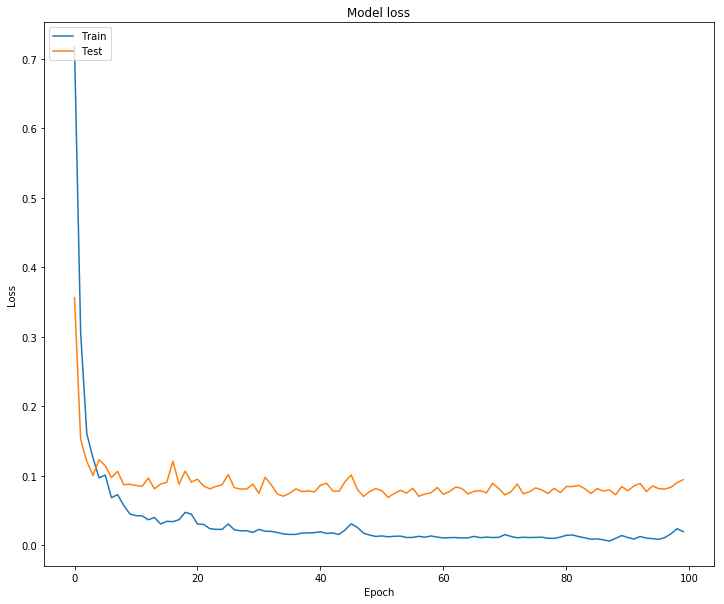

In [91]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Whitening

In [92]:
pca = dec.PCA(n_components=14)
pca.fit(boston)

PCA(copy=True, iterated_power='auto', n_components=14, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [93]:
pca = dec.PCA(n_components=14, whiten=True)
pca.fit(boston)
boston_whiten = pd.DataFrame(pca.transform(boston), columns =boston.columns)
boston_whiten

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.681508,-0.070059,-0.113950,0.320981,0.186845,-0.030093,-1.195454,-1.554510,1.236011,1.550408,-0.810905,0.116136,-0.114993,0.330916
1,-0.960167,0.128689,-1.083597,0.073223,-0.152216,0.083313,-0.712645,-0.884073,-0.148759,0.265975,0.979739,-0.134515,-0.309330,-0.736799
2,-0.964469,0.177350,-0.562518,-0.593586,1.212336,0.604822,0.120108,-0.374935,0.201144,-0.480560,1.134980,-0.521406,-0.536842,0.101682
3,-1.083226,0.230959,-0.212275,-1.175221,0.978605,0.776677,-0.842677,-0.216832,0.214591,-0.729930,1.152612,-0.168570,-0.315341,0.984712
4,-1.083079,0.202770,-0.435360,-0.830369,1.184552,0.855421,-0.751467,0.457089,0.580204,-1.097208,1.555638,-0.350616,-0.419302,0.991762
5,-1.075263,0.236887,-0.569921,-0.680198,0.525371,0.577007,-1.246535,-0.412370,0.115531,-0.519865,1.256617,0.645770,-0.282738,0.575957
6,-0.593311,-0.110145,-0.262913,0.107054,-0.221420,-0.134930,-0.260977,0.197632,0.268669,1.623225,1.477653,0.579857,-0.432021,-0.163235
7,-0.581170,-0.127958,-1.048901,1.293777,0.071935,-0.063388,-0.326485,1.612295,1.069494,0.818885,2.916823,0.407389,-0.669058,-0.280173
8,-0.559349,-0.002068,-1.205021,1.435528,-1.441874,-0.556833,-0.531346,2.829279,1.444335,1.174327,2.859659,-0.050355,-0.432750,-0.704645
9,-0.568241,-0.003230,-0.785708,0.859857,-0.663349,-0.341424,-0.676932,0.474576,0.432254,1.559203,2.802985,0.167866,-0.412348,-0.287483


In [94]:
boston_whiten.corr().round()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0
ZN,0.0,1.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0
INDUS,-0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0
CHAS,-0.0,0.0,0.0,1.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0
NOX,0.0,-0.0,0.0,0.0,1.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0
RM,0.0,0.0,0.0,-0.0,-0.0,1.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0
AGE,-0.0,-0.0,0.0,0.0,0.0,-0.0,1.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0
DIS,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,1.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0
RAD,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,1.0,0.0,-0.0,-0.0,-0.0,-0.0
TAX,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,1.0,0.0,0.0,0.0,0.0


linear transformations on the values in the dataset to remove the correlations betweent the values, standardising the columns to show this I will call the correlation and the standard deviation to show this

In [95]:
boston_whiten.mean().round()

CRIM       0.0
ZN         0.0
INDUS      0.0
CHAS      -0.0
NOX       -0.0
RM        -0.0
AGE        0.0
DIS       -0.0
RAD       -0.0
TAX        0.0
PTRATIO   -0.0
B         -0.0
LSTAT      0.0
MEDV      -0.0
dtype: float64

In [96]:
boston_whiten.std().round()

CRIM       1.0
ZN         1.0
INDUS      1.0
CHAS       1.0
NOX        1.0
RM         1.0
AGE        1.0
DIS        1.0
RAD        1.0
TAX        1.0
PTRATIO    1.0
B          1.0
LSTAT      1.0
MEDV       1.0
dtype: float64

In [97]:
x_whiten = boston_whiten[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
y_whiten = boston_whiten[['MEDV']]

In [98]:
x_whiten_train, x_whiten_test, y_whiten_train, y_whiten_test = mod.train_test_split(x_whiten, y_whiten, test_size=0.3)

In [99]:
m = kr.models.Sequential()


m.add(kr.layers.Dense(130, input_dim=13, activation="relu"))
m.add(kr.layers.Dense(60, activation="relu"))
#m.add(kr.layers.Dense(65,  activation="sigmoid"))
m.add(kr.layers.Dense(60, activation="relu"))
m.add(kr.layers.Dense(30,  activation="relu"))
m.add(kr.layers.Dense(1, activation="linear"))

m.compile(loss="mean_squared_error", optimizer="adam", metrics=['accuracy'])

In [100]:
history = m.fit(x_scaled_train, y_scaled_train, validation_split=0.25,epochs=100, batch_size=10, verbose=1)

Train on 265 samples, validate on 89 samples
Epoch 1/100
265/265 [==============================] - 0s 1ms/step - loss: 0.7222 - accuracy: 0.0000e+00 - val_loss: 0.3410 - val_accuracy: 0.0000e+00
Epoch 2/100
265/265 [==============================] - 0s 158us/step - loss: 0.2816 - accuracy: 0.0000e+00 - val_loss: 0.1214 - val_accuracy: 0.0000e+00
Epoch 3/100
265/265 [==============================] - 0s 181us/step - loss: 0.1887 - accuracy: 0.0000e+00 - val_loss: 0.1355 - val_accuracy: 0.0000e+00
Epoch 4/100
265/265 [==============================] - 0s 166us/step - loss: 0.1666 - accuracy: 0.0000e+00 - val_loss: 0.1145 - val_accuracy: 0.0000e+00
Epoch 5/100
265/265 [==============================] - 0s 211us/step - loss: 0.1386 - accuracy: 0.0000e+00 - val_loss: 0.1701 - val_accuracy: 0.0000e+00
Epoch 6/100
265/265 [==============================] - 0s 181us/step - loss: 0.1632 - accuracy: 0.0000e+00 - val_loss: 0.1004 - val_accuracy: 0.0000e+00
Epoch 7/100
265/265 [==================

Epoch 54/100
265/265 [==============================] - 0s 143us/step - loss: 0.0156 - accuracy: 0.0000e+00 - val_loss: 0.0960 - val_accuracy: 0.0000e+00
Epoch 55/100
265/265 [==============================] - 0s 166us/step - loss: 0.0161 - accuracy: 0.0000e+00 - val_loss: 0.0865 - val_accuracy: 0.0000e+00
Epoch 56/100
265/265 [==============================] - 0s 139us/step - loss: 0.0133 - accuracy: 0.0000e+00 - val_loss: 0.0796 - val_accuracy: 0.0000e+00
Epoch 57/100
265/265 [==============================] - 0s 139us/step - loss: 0.0136 - accuracy: 0.0000e+00 - val_loss: 0.0804 - val_accuracy: 0.0000e+00
Epoch 58/100
265/265 [==============================] - 0s 135us/step - loss: 0.0126 - accuracy: 0.0000e+00 - val_loss: 0.0830 - val_accuracy: 0.0000e+00
Epoch 59/100
265/265 [==============================] - 0s 139us/step - loss: 0.0196 - accuracy: 0.0000e+00 - val_loss: 0.0833 - val_accuracy: 0.0000e+00
Epoch 60/100
265/265 [==============================] - 0s 135us/step - loss

In [101]:
m.predict(x_scaled_test).round().T 

array([[-0., -1.,  0., -0.,  0., -0.,  1., -1., -1.,  0., -0.,  1.,  0.,
        -0.,  0., -0., -0., -0., -1., -1.,  1.,  1., -0., -0., -0.,  0.,
        -1.,  0.,  0., -0., -1., -0.,  1.,  0., -1., -0., -2., -1., -0.,
         0., -1., -0., -1.,  0., -0., -0.,  1.,  0., -0., -1.,  1., -0.,
        -0., -2., -0.,  0.,  0., -1., -0., -0.,  1.,  0., -0.,  0., -0.,
         0.,  2., -0., -2.,  1., -0., -0., -1., -0.,  2.,  1., -1., -0.,
        -1.,  1., -0.,  0., -0.,  3., -1., -0., -0.,  1.,  1., -0.,  0.,
        -1.,  1.,  1.,  1.,  0., -1.,  1., -1., -1.,  1., -2.,  1., -1.,
        -0.,  0., -0., -0.,  0.,  0., -0., -1., -0., -0.,  0.,  0.,  3.,
        -1., -1., -0.,  1., -1.,  3., -0., -1., -0., -0.,  1.,  1., -2.,
         1., -0., -2., -1., -0.,  1., -0., -0.,  3.,  2.,  0., -0., -0.,
        -1., -1., -1., -1.,  0., -0.,  1.,  0., -1.]], dtype=float32)

In [102]:
y_scaled_test.as_matrix().astype(np.float32)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[-0.41715297],
       [-0.84161913],
       [ 0.8235943 ],
       [-0.12329178],
       [-0.0362218 ],
       [-0.29743174],
       [ 1.3786654 ],
       [-0.8960379 ],
       [-0.4715717 ],
       [ 0.84536177],
       [-0.286548  ],
       [ 1.052153  ],
       [-0.19947802],
       [-0.5586417 ],
       [ 0.24675564],
       [-0.41715297],
       [-0.79808414],
       [ 0.2141044 ],
       [-1.0919453 ],
       [-0.68924665],
       [ 1.5745729 ],
       [ 1.5963404 ],
       [ 0.2358719 ],
       [-0.21036176],
       [-0.37361798],
       [ 0.18145315],
       [-0.86338663],
       [-0.19947802],
       [ 0.26852313],
       [-0.62394416],
       [-0.8742704 ],
       [-0.5912929 ],
       [ 1.3460141 ],
       [ 1.4875029 ],
       [-1.0266428 ],
       [-0.21036176],
       [-1.3205041 ],
       [-1.5490627 ],
       [-0.40626922],
       [ 0.14880191],
       [-1.1572478 ],
       [ 0.24675564],
       [-0.31919923],
       [ 0.22498815],
       [-0.7436654 ],
       [-0

In [103]:
m.evaluate(x_scaled_test, y_scaled_test)

152/152 [==============================] - 0s 46us/step


[0.16419223892061333, 0.0]

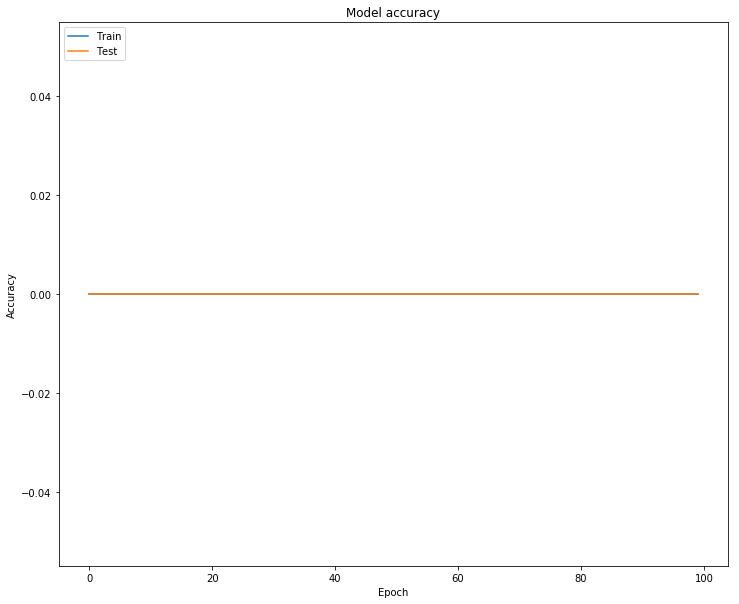

In [104]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

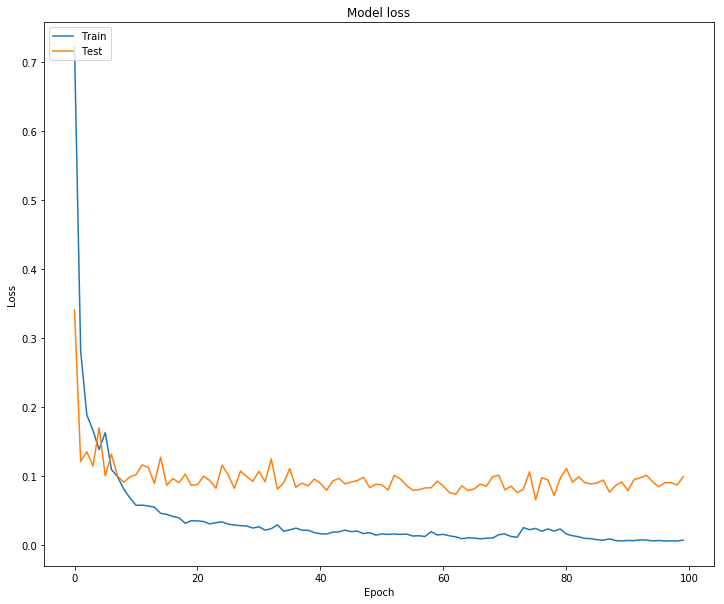

In [105]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Before I leave this section I want to see if only using data that is above + or - .4 correlation to MEDV will make a difference.

Again looking at MEDV the strongest relationship on the correlation matrix is a positive 0.7 with RM and a negative -.74 with LSTAT.

Other datapoints that show correlation with MEDV are INDUS at -.48, NOX at -.43, TAX at -.47 and PTRATIO at -.51.

In [106]:
# splitting the datarame into input and output
x_corr = boston[['INDUS', 'NOX', 'RM', 'TAX', 'PTRATIO', 'LSTAT']]
y_corr = boston[['MEDV']]

In [107]:
x_corr_train, x_corr_test, y_corr_train, y_corr_test = mod.train_test_split(x_corr, y_corr, test_size=0.3)

In [108]:
m = kr.models.Sequential()


m.add(kr.layers.Dense(130, input_dim=6, activation="relu"))
m.add(kr.layers.Dense(60, activation="relu"))
#m.add(kr.layers.Dense(65,  activation="sigmoid"))
m.add(kr.layers.Dense(60, activation="relu"))
m.add(kr.layers.Dense(30,  activation="relu"))
m.add(kr.layers.Dense(1, activation="linear"))

m.compile(loss="mean_squared_error", optimizer="adam", metrics=['accuracy'])

In [109]:
history = m.fit(x_corr_train, y_corr_train, validation_split=0.25,epochs=100, batch_size=10, verbose=1)

Train on 265 samples, validate on 89 samples
Epoch 1/100
265/265 [==============================] - 0s 1ms/step - loss: 261.5547 - accuracy: 0.0000e+00 - val_loss: 203.2274 - val_accuracy: 0.0000e+00
Epoch 2/100
265/265 [==============================] - 0s 184us/step - loss: 219.8069 - accuracy: 0.0038 - val_loss: 222.3390 - val_accuracy: 0.0000e+00
Epoch 3/100
265/265 [==============================] - 0s 211us/step - loss: 188.3190 - accuracy: 0.0038 - val_loss: 183.7722 - val_accuracy: 0.0000e+00
Epoch 4/100
265/265 [==============================] - 0s 207us/step - loss: 161.5195 - accuracy: 0.0075 - val_loss: 175.4704 - val_accuracy: 0.0000e+00
Epoch 5/100
265/265 [==============================] - 0s 192us/step - loss: 144.8871 - accuracy: 0.0000e+00 - val_loss: 133.0864 - val_accuracy: 0.0000e+00
Epoch 6/100
265/265 [==============================] - 0s 199us/step - loss: 112.7619 - accuracy: 0.0075 - val_loss: 143.9765 - val_accuracy: 0.0000e+00
Epoch 7/100
265/265 [==========

Epoch 55/100
265/265 [==============================] - 0s 151us/step - loss: 23.1095 - accuracy: 0.0075 - val_loss: 32.2643 - val_accuracy: 0.0112
Epoch 56/100
265/265 [==============================] - 0s 143us/step - loss: 30.8413 - accuracy: 0.0113 - val_loss: 30.3051 - val_accuracy: 0.0112
Epoch 57/100
265/265 [==============================] - 0s 154us/step - loss: 29.6954 - accuracy: 0.0038 - val_loss: 30.7957 - val_accuracy: 0.0000e+00
Epoch 58/100
265/265 [==============================] - 0s 154us/step - loss: 27.8790 - accuracy: 0.0075 - val_loss: 27.5171 - val_accuracy: 0.0000e+00
Epoch 59/100
265/265 [==============================] - 0s 151us/step - loss: 22.1070 - accuracy: 0.0038 - val_loss: 28.3612 - val_accuracy: 0.0112
Epoch 60/100
265/265 [==============================] - 0s 162us/step - loss: 32.8511 - accuracy: 0.0113 - val_loss: 46.3018 - val_accuracy: 0.0112
Epoch 61/100
265/265 [==============================] - 0s 139us/step - loss: 32.0890 - accuracy: 0.0113

In [110]:
m.predict(x_corr_test).round().T

array([[30., 18., 16., 17., 20., 14., 23., 20., 21., 19., 17., 14., 24.,
        20., 29., 21., 23., 33., 21., 16., 42., 14., 19., 17., 16., 28.,
        15., 15., 20., 16., 10., 21., 31., 13., 31., 31., 20., 34., 15.,
        18., 13., 22., 27., 22., 19., 15., 15., 17., 35., 15., 15., 21.,
        10., 19., 15., 39., 33., 12., 43., 21., 22., 21., 20., 39., 16.,
        11., 22., 44., 13., 22., 21., 20., 23., 19., 21., 30., 34., 23.,
        28., 19., 22., 15., 29., 24., 18., 21., 16., 18., 29., 19., 37.,
        19., 12., 17., 17., 15., 16., 17., 22., 15., 22., 16., 18., 16.,
        19., 15., 15., 19., 18., 22., 12., 27., 23., 17., 24., 13., 16.,
        18., 19., 19., 26., 30., 45., 15., 28., 16., 17., 21., 19., 24.,
        12., 28., 32., 19., 14., 31., 19., 19., 17., 11., 32., 14., 21.,
        38., 21., 19., 29., 17., 17., 18., 31., 34.]], dtype=float32)

In [111]:
y_corr_test.as_matrix().astype(np.float32)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[32.7],
       [16.6],
       [14.9],
       [17.2],
       [22. ],
       [13. ],
       [22.8],
       [15. ],
       [18.4],
       [17.5],
       [10.9],
       [ 7.2],
       [30.3],
       [29.6],
       [23.6],
       [23. ],
       [24.3],
       [35.4],
       [21.4],
       [14.4],
       [21.9],
       [15.6],
       [22.7],
       [27.9],
       [19.1],
       [31.6],
       [16.1],
       [19. ],
       [30.7],
       [13.1],
       [13.8],
       [19.9],
       [33.1],
       [10.2],
       [29. ],
       [31.2],
       [22. ],
       [33.3],
       [13.6],
       [22.6],
       [23.1],
       [21.6],
       [33. ],
       [27.5],
       [20.6],
       [19.6],
       [18.9],
       [22.8],
       [37.9],
       [14.3],
       [19.3],
       [22. ],
       [ 8.8],
       [19.6],
       [20. ],
       [38.7],
       [37.2],
       [15.4],
       [46. ],
       [22. ],
       [27.5],
       [24.1],
       [21.2],
       [44. ],
       [16.8],
       [16.3],
       [50

In [112]:
m.evaluate(x_corr_test, y_corr_test)

152/152 [==============================] - 0s 39us/step


[30.92943467591938, 0.00657894741743803]

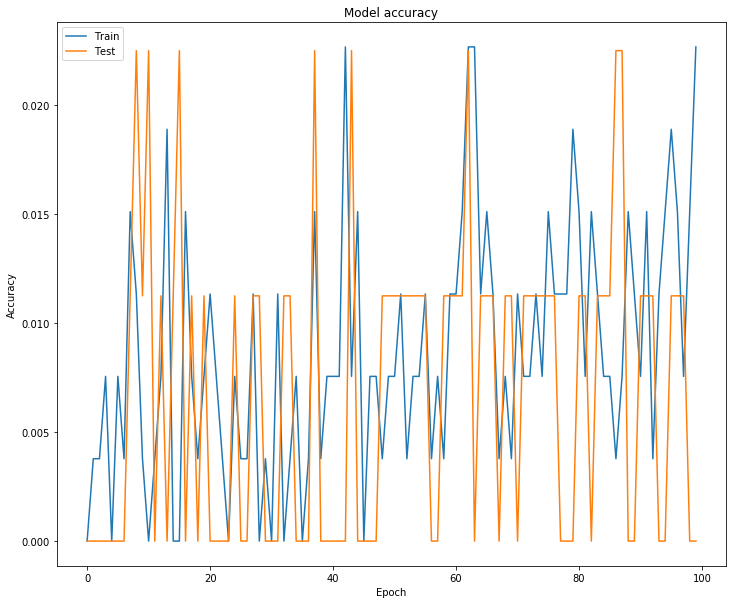

In [113]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

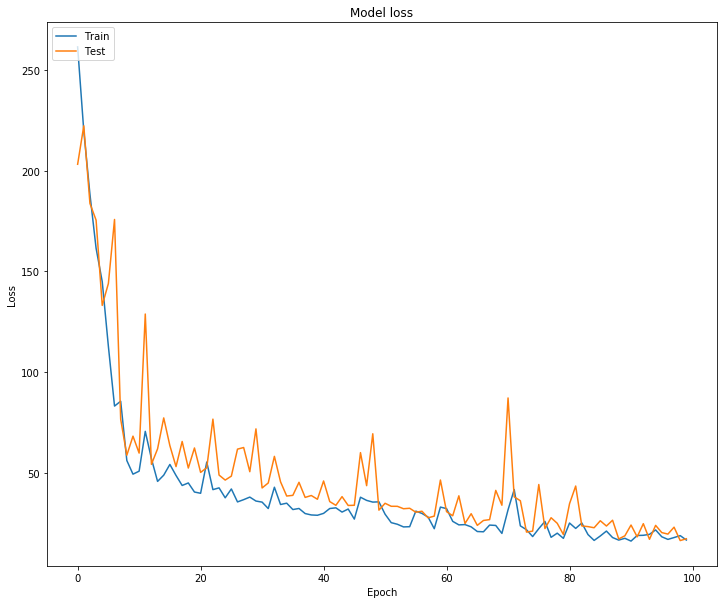

In [114]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()